# DATAthon -  올림픽기록 분석

- 배경
    - 대상기간 : 1896년 아테네올림픽 ~ 2016년 리우 올림픽까지
    - 현대 올림픽에 대한 역사적인 데이터 세트
    - 1992년까지 동계 올림픽과 하계 올림픽은 같은 해에 개최됨(1896 ~ 1992)

- 주제
    - 데이터셋을 통해서 올림픽 종목, 메달에 대한 자유로운 분석을 통해 결과를 추론
    - 여성, 다양한 국가, 다양한 스포츠 및 종목의 참여와 성과에 대한 질문을 포함해 
      올림픽이 시간이 지남에 따라 어떻게 발전해왔는지에 대해서 분석
- 데이터셋
    - athlete_events.csv (선수이벤트)
        - 271116개의 행과 15개 열로 구성
        - 각 행은 개별 올림픽 종목에 출전하는 개별 선수에 해당  
               
    - noc_regions.csv ()
        - NOC(국가 올림픽 위원회 3글자 코드)의 상세정보
    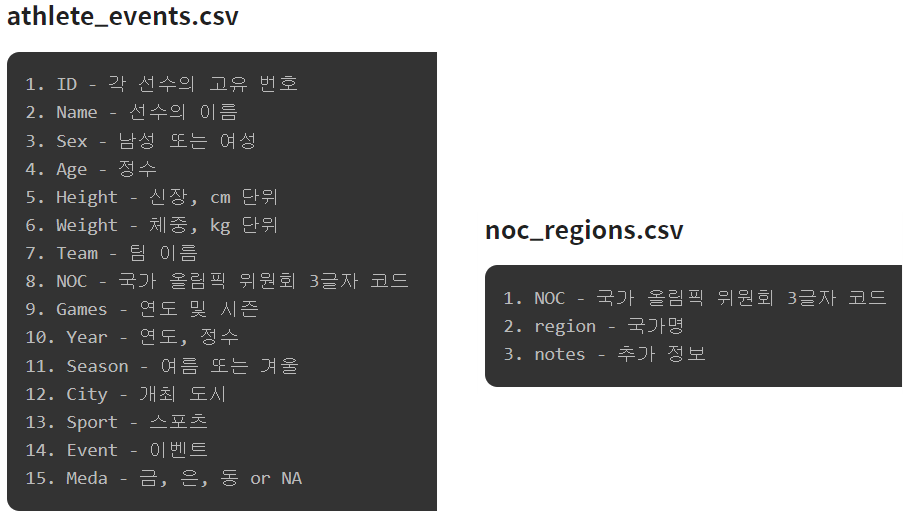
               
- 데이터 링크
    https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/data?select=noc_regions.csv

# 1. lib import 및 csv파일 내용확인

In [110]:
# 자료를 확인하기 위한 lib import하기
import pandas as pd 
import numpy as np

#csv head정보
data = pd.read_csv('data/athlete_events.csv')  #athlete_events.csv (선수이벤트) 
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [203]:
data1  = pd.read_csv('data/noc_regions.csv')  #noc_regions.csv 자료확인
data1.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [112]:
len(data), len(data1)

(271116, 230)

In [113]:
data.info()  #athlete_events.csv 컬럼정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [114]:
data1.info() #noc_regions.csv 컬럼정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


# 1-1. 전체자료의 중복자료건 확인 및 보정처리(1385건)

In [115]:
#athlete_events 데이타중복건 확인
data[data.duplicated()]   #1385건

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


# => 확인결과(athlete_events)

- id값이 중복되는 자료가 존재(1385건)  -> 해당건은 확인후 자료 삭제가 필요

In [116]:
#중복자료 삭제처리
df = pd.DataFrame(data)
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [117]:
len(df)

269731

In [118]:
#자료를 조회하고 삭제하는 부분 참조

#data[(data['ID'] == 6883) & (data['Event'] == "Cycling Men's Sprint")] #중복-삭제
#data.drop([12639], axis=0, inplace=True)

In [119]:
#csv 파일항목 수치형 변수기준으로 count~max값까지 출력정보
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


# => 확인결과(athlete_events)

- count: 271116건이 아닌자료를 확인(결측치 항목을 확인) --> Age,Height,Weight
- 자료의 결측치 내용 확인필요

In [120]:
#csv 파일항목 수치형 변수기준으로 count~max값까지 출력정보
data1.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


# => 확인결과(noc_regions)

- region의 건수가 227로 결측치 자료존재 -> 해당자료 3건 확인필요
- region의 unique한 건이 206건으로 227건중 중복건이 존재함 -> 대상자료확인이 필요

# 1-2. 결측치 처리

 - 결측치 항목 -> 특정값으로 채울지, 버릴지 판단필요 
   - athlete_events : Age,Height,Weight, Medal 
   - noc_regions : region

In [121]:
#athlete_events파일의 결측치가 있는 대상 데이타 건수확인
df = pd.DataFrame(data)
df.isnull().sum() #전체 결측치가 있는 행갯수

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

# 결측치 항목(athlete_events) 및 대상건수 확인

- Age:9474, Height:60171, Weight:62875, Medal:231333 

In [122]:
#dropna=True 결측치제외, False 결측치포함
df.value_counts(subset='Age', normalize=False, sort=False, ascending=True, dropna=False)

Age
10.0       1
11.0      13
12.0      39
13.0     187
14.0     837
        ... 
84.0       1
88.0       3
96.0       1
97.0       1
NaN     9474
Length: 75, dtype: int64

In [123]:
#Age 결측치 자료확인
df[df['Age'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
147,54,Mohamed Jamshid Abadi,M,NaN,NaN,NaN,Iran,IRI,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN
152,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Individual",NaN
153,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Team",NaN
162,66,Mohamed Abakkar,M,NaN,156.0,48.0,Sudan,SUD,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Flyweight,NaN
212,102,Sayed Fahmy Abaza,M,NaN,NaN,NaN,Egypt,EGY,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270679,135368,Antonio A. Zucchi,M,NaN,NaN,NaN,Argentina,ARG,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,NaN
270774,135416,Star Zulu,M,NaN,NaN,NaN,Zambia,ZAM,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Bantamweight,NaN
270793,135426,Max Zumstein,M,NaN,NaN,NaN,Switzerland,SUI,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,NaN
270804,135434,Edmundo Ziga Erraz,M,NaN,180.0,95.0,Chile,CHI,1948 Summer,1948,Summer,London,Athletics,Athletics Men's Hammer Throw,NaN


In [124]:
df[df['Age'].isnull()].value_counts(subset=['Games','Sport','Event'], normalize=False, sort=False, ascending=True, dropna=False)

Games        Sport         Event                                   
1896 Summer  Athletics     Athletics Men's 1,500 metres                2
                           Athletics Men's 100 metres                  4
                           Athletics Men's 110 metres Hurdles          2
                           Athletics Men's 400 metres                  1
                           Athletics Men's 800 metres                  2
                                                                      ..
1998 Winter  Bobsleigh     Bobsleigh Men's Four                        1
                           Bobsleigh Men's Two                         1
2000 Summer  Table Tennis  Table Tennis Women's Singles                1
2008 Summer  Gymnastics    Gymnastics Women's Individual All-Around    1
                           Gymnastics Women's Uneven Bars              1
Length: 1827, dtype: int64

In [125]:
df[~df['Age'].isnull()].value_counts(subset=['Age','Games'], normalize=False, sort=False, ascending=True, dropna=False)

Age   Games      
10.0  1896 Summer    1
11.0  1924 Winter    1
      1928 Summer    1
      1932 Winter    2
      1936 Winter    1
                    ..
81.0  1948 Summer    1
84.0  1948 Summer    1
88.0  1932 Summer    3
96.0  1932 Summer    1
97.0  1928 Summer    1
Length: 2145, dtype: int64

In [126]:
#Height 결측치 자료확인
df[df['Height'].isnull()]

#Height값이 없는 대상의 년도를 확인,Season 하기

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN
36,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271038,135539,Marius Edmund Zwiller,M,18.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Men's 200 metres Breaststroke,NaN
271042,135542,Werner Zwingli,M,29.0,NaN,NaN,Switzerland,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Men's 15 kilometres,NaN
271043,135542,Werner Zwingli,M,29.0,NaN,NaN,Switzerland,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
271075,135552,Jan (Johann-) Zybert (Siebert-),M,20.0,NaN,NaN,Poland,POL,1928 Summer,1928,Summer,Amsterdam,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",NaN


In [127]:
#Height 결측치 자료확인
df[df['Weight'].isnull()]

#Weight값이 없는 대상의 년도를 확인,Season 하기

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271038,135539,Marius Edmund Zwiller,M,18.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Men's 200 metres Breaststroke,NaN
271042,135542,Werner Zwingli,M,29.0,NaN,NaN,Switzerland,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Men's 15 kilometres,NaN
271043,135542,Werner Zwingli,M,29.0,NaN,NaN,Switzerland,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
271075,135552,Jan (Johann-) Zybert (Siebert-),M,20.0,NaN,NaN,Poland,POL,1928 Summer,1928,Summer,Amsterdam,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",NaN


In [128]:
#Medal 결측치 자료확인
df[df['Medal'].isnull()]

#Medal값이 없는 대상의 년도를 확인,Season 하기

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [206]:
#noc_regions 파일의 결측치가 있는 대상 데이타의 건수확인
df1 = pd.DataFrame(data1)
df1.isnull().sum() #전체 결측치가 있는 행갯수

NOC         0
region      3
notes     209
dtype: int64

# 결측치 항목(noc_regions) 및 대상건수 확인

 - region:3건
 
 - noc_regions 파일의 결측치 존재하는 컬럼 : region
    - region의 지역값이 빠진자료 3건을 확인하고 어떻게 처리할지 고민필요
    - region의 지역중복값을 확인하고 올바른 자료인지 확인필요 (unique : 206)

In [130]:
#region 결측치 자료확인
df1[df1['region'].isnull()]

#region값이 없는컬럼 확인 -> 어떤값을 대체 가능한지 확인

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


- NOC컬럼의 값이 (noc_regions)이 athlete_events 자료에 없는 건이 있는지 확인하기

In [131]:
df1[df1['region'] == 'Singapore']

,NOC,region,notes
178,SIN,Singapore,NaN


In [132]:
df[df['NOC'] == 'SIN']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [133]:
data['NOC'].value_counts()

USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
       ...  
YMD        5
SSD        3
UNK        2
NBO        2
NFL        1
Name: NOC, Length: 230, dtype: int64

In [134]:
# athlete_events('NOC') - noc_regions('NOC') = athlete_events에만 있는자료 (left ani join)
# 해당자료가 noc_regions에 있는지 확인 (당연히 없을거다)

df2 = pd.merge(df, df1, how='outer', on = 'NOC', indicator=True)
df2 = df2.query("_merge=='left_only'")
df2['NOC'].value_counts()

SGP    349
Name: NOC, dtype: int64

In [135]:
df1[df1['NOC'] == 'SGP']

,NOC,region,notes


- athlete_events('NOC') = 'SGP'
- noc_regions (NOC') = 'SIN' 로 코드연결이 잘못되어 있음

In [136]:
df[df['NOC'] == 'SGP']['Team'].value_counts()

Singapore       338
Rika II           4
June Climene      3
Singapore-2       2
Singapore-1       2
Name: Team, dtype: int64

In [137]:
df['NOC'].replace({'SGP': 'SIN'}, inplace=True)

In [138]:
df[df['NOC'] == 'SIN']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
578,332,Zarinah Abdullah,F,21.0,NaN,NaN,Singapore,SIN,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN
579,332,Zarinah Abdullah,F,25.0,NaN,NaN,Singapore,SIN,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.0,68.0,Singapore,SIN,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN
7659,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SIN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN
7660,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SIN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268752,134454,Zhang Guirong,F,26.0,182.0,95.0,Singapore,SIN,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Shot Put,NaN
268753,134454,Zhang Guirong,F,30.0,182.0,95.0,Singapore,SIN,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,NaN
268993,134587,Zhang Xueling,F,21.0,163.0,53.0,Singapore,SIN,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Singles,NaN
268994,134587,Zhang Xueling,F,21.0,163.0,53.0,Singapore-1,SIN,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Doubles,NaN


# 1-4. 이상치 탐지 및 처리 (Outliers)

# 1-5. 종속변수, 독립변수를 구별하기

- 종속변수 : 머신러닝의 예측해야할 대상
- 독립변수 : 종속변수를 예측하기 위한 재료들
 * Feature engineering은 더 추가적인 독립변수를 꺼집어 내는 행위

# 1-6. 두자료 merge

In [139]:
#두 csv파일을 merge해보기(left outer join)
df_a = pd.DataFrame(data)
df_b = pd.DataFrame(data1)
df_c = df_a.merge(df_b, on = 'NOC', how='outer')
df_c

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,120575,Mamorallo Tjoka,F,23.0,150.0,56.0,Lesotho,LES,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
271112,120575,Mamorallo Tjoka,F,27.0,150.0,56.0,Lesotho,LES,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
271113,122166,M'apotlaki Ts'elho,F,15.0,NaN,NaN,Lesotho,LES,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Lesotho,NaN
271114,122215,Lefa Tsapi,M,23.0,170.0,63.0,Lesotho,LES,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,NaN,Lesotho,NaN


In [140]:
#Games, region, Medal, 

In [141]:
#선수정보로만 나라별 건수확인
df_a.value_counts(subset='NOC', normalize=False, sort=False, ascending=True, dropna=False)

NOC
AFG     126
AHO      79
ALB      70
ALG     551
AND     169
       ... 
YEM      32
YMD       5
YUG    2583
ZAM     183
ZIM     311
Length: 230, dtype: int64

In [142]:
#대한민국 건수 noc = kor 
len(df_a[df_a['NOC'] == 'KOR'])  #전체건수 : 4464

4464

In [143]:
#대한민국으로 조회되는 건수
df_a[df_a['NOC'] == 'KOR']['Team'].value_counts()  #561건

#대한민국 데이타는 이 3개가 전부인가?
#결측치, 이상치는 없는가 확인하기
#북한선수가 혹 끼어있는지 획인필요
#일제시대때 손기정 선수는 포함을 시켜야 하는지?  그런 유형을 구별할수 있는지? 방법은?

#South Korea-2 대상을 확인
#df_a[(df_a['NOC'] == 'KOR')]
#df_a[(df_a['NOC'] == 'KOR') &  (df_a['Team'] == 'South Korea-2')][['Games','']].value_counts()  #561건

South Korea      4344
South Korea-2      60
South Korea-1      60
Name: Team, dtype: int64

In [144]:
#South Korea-2 대상을 확인
df_a[(df_a['NOC'] == 'KOR')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2520,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
2521,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN
2522,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2523,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
2524,1422,Ahn Jin-Soo,M,20.0,178.0,70.0,South Korea,KOR,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266827,133496,Yun Yeong-Suk,F,17.0,170.0,68.0,South Korea,KOR,1988 Summer,1988,Summer,Seoul,Archery,Archery Women's Individual,Bronze
266828,133496,Yun Yeong-Suk,F,17.0,170.0,68.0,South Korea,KOR,1988 Summer,1988,Summer,Seoul,Archery,Archery Women's Team,Gold
266830,133498,Yun Yong-Ho,M,23.0,183.0,82.0,South Korea,KOR,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Coxless Fours,NaN
266831,133499,Yun Yong-Il,M,22.0,177.0,63.0,South Korea,KOR,1996 Summer,1996,Summer,Atlanta,Tennis,Tennis Men's Doubles,NaN


In [145]:
df_a[(df_a['NOC'] == 'KOR') &  (df_a['Team'] == 'South Korea-2')].value_counts()  #561건

ID      Name             Sex  Age   Height  Weight  Team           NOC  Games        Year  Season  City       Sport         Event                       Medal 
3585    An Jae-Hyeong    M    23.0  183.0   74.0    South Korea-2  KOR  1988 Summer  1988  Summer  Seoul      Table Tennis  Table Tennis Men's Doubles  Bronze    1
44426   Ha Tae-Gwon      M    25.0  187.0   87.0    South Korea-2  KOR  2000 Summer  2000  Summer  Sydney     Badminton     Badminton Men's Doubles     Bronze    1
                              29.0  187.0   87.0    South Korea-2  KOR  2004 Summer  2004  Summer  Athina     Badminton     Badminton Men's Doubles     Gold      1
59848   Kim Dong-Mun     M    24.0  184.0   74.0    South Korea-2  KOR  2000 Summer  2000  Summer  Sydney     Badminton     Badminton Men's Doubles     Bronze    1
                              28.0  184.0   74.0    South Korea-2  KOR  2004 Summer  2004  Summer  Athina     Badminton     Badminton Men's Doubles     Gold      1
60290   Kim Taek-Su  

In [146]:
df_a[(df_a['NOC'] == 'KOR') &  (df_a['Team'] == 'South Korea-2')][['Games','Sport']].value_counts()  #561건

Games        Sport       
1996 Summer  Badminton       6
2000 Summer  Badminton       6
2004 Summer  Badminton       6
2008 Summer  Badminton       6
2014 Winter  Bobsleigh       6
1992 Summer  Badminton       4
             Table Tennis    4
1996 Summer  Table Tennis    4
2000 Summer  Table Tennis    4
2004 Summer  Table Tennis    4
2012 Summer  Badminton       4
2016 Summer  Badminton       4
1988 Summer  Table Tennis    2
dtype: int64

In [147]:
#
df_c[(df_c['NOC'] == 'KOR')][['Team','Games','Sport','region']].value_counts()  #561건

Team         Games        Sport                region     
South Korea  1964 Summer  Gymnastics           South Korea    63
             1996 Summer  Gymnastics           South Korea    60
             1988 Summer  Athletics            South Korea    59
             1984 Summer  Gymnastics           South Korea    58
             1992 Summer  Gymnastics           South Korea    58
                                                              ..
             1972 Winter  Figure Skating       South Korea     1
             2012 Summer  Triathlon            South Korea     1
             1996 Summer  Modern Pentathlon    South Korea     1
             1972 Summer  Weightlifting        South Korea     1
             2008 Summer  Rhythmic Gymnastics  South Korea     1
Length: 412, dtype: int64

In [148]:
df_c[(df_c['NOC'] == 'KOR') &  (df_c['Team'] == 'South Korea-2')][['Team','Games','Sport','region']].value_counts()  #561건

Team           Games        Sport         region     
South Korea-2  1996 Summer  Badminton     South Korea    6
               2000 Summer  Badminton     South Korea    6
               2004 Summer  Badminton     South Korea    6
               2008 Summer  Badminton     South Korea    6
               2014 Winter  Bobsleigh     South Korea    6
               1992 Summer  Badminton     South Korea    4
                            Table Tennis  South Korea    4
               1996 Summer  Table Tennis  South Korea    4
               2000 Summer  Table Tennis  South Korea    4
               2004 Summer  Table Tennis  South Korea    4
               2012 Summer  Badminton     South Korea    4
               2016 Summer  Badminton     South Korea    4
               1988 Summer  Table Tennis  South Korea    2
dtype: int64

In [149]:
df_c[(df_c['NOC'] == 'KOR') &  (df_c['Team'] == 'South Korea-1')][['Team','Games','Sport','region']].value_counts()  #561건

Team           Games        Sport         region     
South Korea-1  1996 Summer  Badminton     South Korea    6
               2000 Summer  Badminton     South Korea    6
               2004 Summer  Badminton     South Korea    6
               2008 Summer  Badminton     South Korea    6
               2014 Winter  Bobsleigh     South Korea    6
               1992 Summer  Badminton     South Korea    4
                            Table Tennis  South Korea    4
               1996 Summer  Table Tennis  South Korea    4
               2000 Summer  Table Tennis  South Korea    4
               2004 Summer  Table Tennis  South Korea    4
               2012 Summer  Badminton     South Korea    4
               2016 Summer  Badminton     South Korea    4
               1988 Summer  Table Tennis  South Korea    2
dtype: int64

In [150]:
df_c[(df_c['NOC'] == 'KOR') &  (df_c['Team'] == 'South Korea')][['Team','Games','Sport','region']].value_counts()  #561건

Team         Games        Sport              region     
South Korea  1964 Summer  Gymnastics         South Korea    63
             1996 Summer  Gymnastics         South Korea    60
             1988 Summer  Athletics          South Korea    59
             1984 Summer  Gymnastics         South Korea    58
             1992 Summer  Gymnastics         South Korea    58
                                                            ..
             2006 Winter  Freestyle Skiing   South Korea     1
             1984 Summer  Sailing            South Korea     1
             1996 Summer  Modern Pentathlon  South Korea     1
             2002 Winter  Skeleton           South Korea     1
             2008 Summer  Equestrianism      South Korea     1
Length: 386, dtype: int64

In [151]:
#대한민국 자료로만 한정해서 자료 조회하기
df_a = df_a[(df_a['NOC'] == 'KOR')]
len(df_a)

4464

In [152]:
df_b = df_b[(df_b['NOC'] == 'KOR')]
len(df_b)

1

In [153]:
df_d = df_a.merge(df_b, on = 'NOC', how='outer')
len(df_d)

4464

In [154]:
df_d 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,South Korea,NaN
1,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN,South Korea,NaN
2,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,South Korea,NaN
3,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,South Korea,NaN
4,1422,Ahn Jin-Soo,M,20.0,178.0,70.0,South Korea,KOR,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,South Korea,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,133496,Yun Yeong-Suk,F,17.0,170.0,68.0,South Korea,KOR,1988 Summer,1988,Summer,Seoul,Archery,Archery Women's Individual,Bronze,South Korea,NaN
4460,133496,Yun Yeong-Suk,F,17.0,170.0,68.0,South Korea,KOR,1988 Summer,1988,Summer,Seoul,Archery,Archery Women's Team,Gold,South Korea,NaN
4461,133498,Yun Yong-Ho,M,23.0,183.0,82.0,South Korea,KOR,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Coxless Fours,NaN,South Korea,NaN
4462,133499,Yun Yong-Il,M,22.0,177.0,63.0,South Korea,KOR,1996 Summer,1996,Summer,Atlanta,Tennis,Tennis Men's Doubles,NaN,South Korea,NaN


In [155]:
#각 id별 종류 -> 참가한 선수로 보여짐 2393명
df_d['ID'].value_counts()

68029     24
54559     24
59841     22
55000     22
132854    21
          ..
51383      1
60340      1
60339      1
60338      1
60148      1
Name: ID, Length: 2393, dtype: int64

In [156]:
#id는한선수의 정보 
df_d[df_d['ID']== 68029][['Name','Games','City', 'Sport', 'Event']].value_counts()

"""
1) 한선수가 최대 몇개의 게임에 출전시 메달을따는 확률이 높았는지? 이게 성적에 영향을 줄수 있는지 상관관계 체크 
   그리고 메달을 따는 실적이 좋은 시기가 최초 도전시인가? 아니면 여러번의 경험으로 따는 확률이 높은가? 

2) 최대 많이 출전한 선수와 최단시기에 메달을 획득한 선수의 나이대, 종목을 표시
3) 그리고 태극마크를 달지 못하고 참석한 모든 선수를 우리나라로 표기하여 자료로 추가하는 작업을 진행
   전체 대한민국의 선수들이 참여한 시기와 종목, 메달수를 정리
   단 메달은 다시 메달 count로 컬럼을 하나 추가 0, 1로 재정리
"""

'\n1) 한선수가 최대 몇개의 게임에 출전시 메달을따는 확률이 높았는지? 이게 성적에 영향을 줄수 있는지 상관관계 체크 \n   그리고 메달을 따는 실적이 좋은 시기가 최초 도전시인가? 아니면 여러번의 경험으로 따는 확률이 높은가? \n\n2) 최대 많이 출전한 선수와 최단시기에 메달을 획득한 선수의 나이대, 종목을 표시\n3) 그리고 태극마크를 달지 못하고 참석한 모든 선수를 우리나라로 표기하여 자료로 추가하는 작업을 진행\n   전체 대한민국의 선수들이 참여한 시기와 종목, 메달수를 정리\n   단 메달은 다시 메달 count로 컬럼을 하나 추가 0, 1로 재정리\n'

In [157]:
df_d[df_d['ID']== 68029][['Name','Games','City', 'Sport', 'Medal']].value_counts()

Name           Games        City    Sport       Medal 
Lee Ju-Hyeong  2000 Summer  Sydney  Gymnastics  Bronze    1
                                                Silver    1
dtype: int64

In [158]:
df_d[df_d['ID']== 68029]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
2988,68029,Lee Ju-Hyeong,M,19.0,163.0,61.0,South Korea,KOR,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Men's Individual All-Around,NaN,South Korea,NaN
2989,68029,Lee Ju-Hyeong,M,19.0,163.0,61.0,South Korea,KOR,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Men's Team All-Around,NaN,South Korea,NaN
2990,68029,Lee Ju-Hyeong,M,19.0,163.0,61.0,South Korea,KOR,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Men's Floor Exercise,NaN,South Korea,NaN
2991,68029,Lee Ju-Hyeong,M,19.0,163.0,61.0,South Korea,KOR,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Men's Horse Vault,NaN,South Korea,NaN
2992,68029,Lee Ju-Hyeong,M,19.0,163.0,61.0,South Korea,KOR,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Men's Parallel Bars,NaN,South Korea,NaN
2993,68029,Lee Ju-Hyeong,M,19.0,163.0,61.0,South Korea,KOR,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,South Korea,NaN
2994,68029,Lee Ju-Hyeong,M,19.0,163.0,61.0,South Korea,KOR,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Men's Rings,NaN,South Korea,NaN
2995,68029,Lee Ju-Hyeong,M,19.0,163.0,61.0,South Korea,KOR,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Men's Pommelled Horse,NaN,South Korea,NaN
2996,68029,Lee Ju-Hyeong,M,23.0,163.0,61.0,South Korea,KOR,1996 Summer,1996,Summer,Atlanta,Gymnastics,Gymnastics Men's Individual All-Around,NaN,South Korea,NaN
2997,68029,Lee Ju-Hyeong,M,23.0,163.0,61.0,South Korea,KOR,1996 Summer,1996,Summer,Atlanta,Gymnastics,Gymnastics Men's Team All-Around,NaN,South Korea,NaN


In [159]:
#손기정선수의 id는
df_a[df_a['NOC'] == 'KOR']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2520,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
2521,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN
2522,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2523,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
2524,1422,Ahn Jin-Soo,M,20.0,178.0,70.0,South Korea,KOR,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266827,133496,Yun Yeong-Suk,F,17.0,170.0,68.0,South Korea,KOR,1988 Summer,1988,Summer,Seoul,Archery,Archery Women's Individual,Bronze
266828,133496,Yun Yeong-Suk,F,17.0,170.0,68.0,South Korea,KOR,1988 Summer,1988,Summer,Seoul,Archery,Archery Women's Team,Gold
266830,133498,Yun Yong-Ho,M,23.0,183.0,82.0,South Korea,KOR,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Coxless Fours,NaN
266831,133499,Yun Yong-Il,M,22.0,177.0,63.0,South Korea,KOR,1996 Summer,1996,Summer,Atlanta,Tennis,Tennis Men's Doubles,NaN


In [207]:
#df_a[(df_a['Name'].str.contains("Son ")) & (df_a['NOC']) ]

#noc_regions 파일의 결측치가 있는 대상 데이타의 건수확인
df1 = pd.DataFrame(data1)
df1.isnull().sum() #전체 결측치가 있는 행갯수


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [208]:
df1.describe()
df1.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [209]:
#df1[df1['region'].str.contains('Curac')]

#region 3개중 nan 값을 특정값으로 바꾸기 -> 결측치 변경하기
df1[df1['region'].isnull()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


In [210]:
#해당건을 보정하는 작업필요
"""
#ROT -> NA
#TUV -> Tuvalu
#UNK -> NA
"""
df1[~(df1['NOC'] == 'ROT')]

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [244]:
df1[df1['region'].isnull()]

,NOC,region,notes
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


In [252]:
#df1['region'] = df1[(df1['NOC']=='ROT')]['region'].fillna('NA')

#df1[(df1['region'].isnull()) & (df1['NOC'] == 'ROT')].fillna('SA')

df1[(df1['NOC'] == 'ROT')].fillna('SA')

,NOC,region,notes
168,ROT,NA,Refugee Olympic Team


In [259]:
#값채우기
#df1.loc[(df1['region'].isnull()) & (df1['NOC'] == 'ROT'), 'region'] = 'SA'
df1.loc[(df1['region'].isnull()) & (df1['NOC'] == 'TUV'), 'region'] = 'Tuvalu'

In [257]:
#특정열에 값을 바꾸는 
df1.loc[(df1['NOC'] == 'ROT'), 'region'] = 'NA'

In [258]:
df1[(df1['NOC'] == 'ROT')]

,NOC,region,notes
168,ROT,NA,Refugee Olympic Team


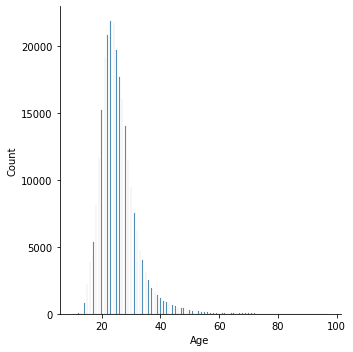

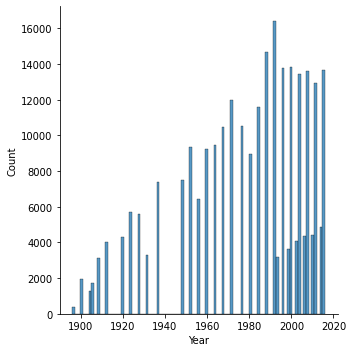

In [359]:
import matplotlib.pyplot as plt
import seaborn as sns

#sns.displot(data['ID'])
sns.displot(data['Age'])
sns.displot(data['Year'])

<AxesSubplot:ylabel='Age'>

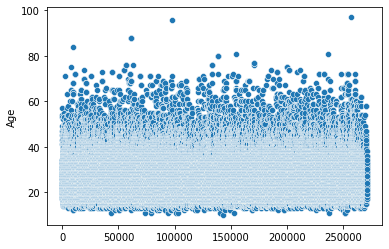

In [358]:
sns.scatterplot(x = data.index, y = data['Age'])
sns.scatterplot(x1 = data.index, y1 = data['Year'])
sns.scatterplot(x2 = data.index, y2 = data['Medal'])